

**The task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



Using TensorFlow backend.


In [2]:
data_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [3]:
print(data_train.shape)
print(data_test.shape)

(60000, 785)
(10000, 785)


In [4]:
X = np.array(data_train.iloc[:, 1:])
# Convert the y_train values to be one-hot encoded for categorical analysis by Keras.
y = to_categorical(np.array(data_train.iloc[:, 0]))



## Here we split validation data to optimize classifier during training

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

## Reshaping the X arrays to include a 4 dimension of the single channel.

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)



## Preprocessing the Data

**Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [7]:
print(X_train.max())
print(X_test.max())
print(X_val.max())

255
255
255


In [8]:
X_train= X_train / 255
X_test= X_test /255
X_val= X_val / 255

In [9]:
print(X_train.max())
print(X_test.max())
print(X_val.max())
print(X_train[0])

1.0
1.0
1.0
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.26666667]
  [0.62352941]
  [0.50980392]
  [0.54117647]
  [0.5372549 ]
  [0.50980392]
  [0.50588235]
  [0.39215686]
  [0.6745098 ]
  [0.41568627]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.01176471]
  [0.77254902]
  [0.62352941]
  [0.62352941]
  [0.63529412]
  [0.58823529]
  [0.55686275]
  [0.59215686]
  [0.74901961]
  [0.83137255]
  [0.72941176]
  [0.03529412]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.09411765]
  [0.70980392]
  [0.6235

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2)
* Dropout 25% of input units 
* 2D Convolutional Layer, filters=64 and kernel_size=(2,2)
* Pooling Layer where pool_size = (2,2)
* Dropout 25% of input units

* 2D Convolutional Layer, filters=128 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2)
* Dropout 40% of input units

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation
* Dropout 30% of input units
* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model.

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [11]:
batch_size = 256
num_classes = 10
#image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows,img_cols,1)
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(MaxPooling2D((2, 2))) # POOLING LAYER
model.add(Dropout(0.25)) #Dropping`25% of input units to 0 at each update during training time, to prevent overfitting.
#
#
#
model.add(Conv2D(64, (3, 3), activation='relu')) # CONVOLUTIONAL LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))# POOLING LAYER 
model.add(Dropout(0.25))#Dropping`25% of input units
#
#
#

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4)) #Dropping`40% of input units
#
#
#
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
#Dropping`30% of input units
model.add(Dropout(0.3))
#
#
#
# Final Dense Layer of 10 Neurons(Can't change the number of Neurons) with a softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Then compile the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

**Note that fit() will return a History object which we can use to plot training vs. validation accuracy and loss.**

In [13]:
epochs = 50
history = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 129us/step - loss: 0.8283 - accuracy: 0.6917 - val_loss: 0.5024 - val_accuracy: 0.8207
Epoch 2/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.5197 - accuracy: 0.8071 - val_loss: 0.4121 - val_accuracy: 0.8546
Epoch 3/50
48000/48000 [==============================] - 2s 36us/step - loss: 0.4443 - accuracy: 0.8349 - val_loss: 0.3642 - val_accuracy: 0.8702
Epoch 4/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.4027 - accuracy: 0.8524 - val_loss: 0.3224 - val_accuracy: 0.8845
Epoch 5/50
48000/48000 [==============================] - 2s 36us/step - loss: 0.3702 - accuracy: 0.8635 - val_loss: 0.3131 - val_accuracy: 0.8869
Epoch 6/50
48000/48000 [==============================] - 2s 36us/step - loss: 0.3522 - accuracy: 0.8707 - val_loss: 0.3137 - val_accuracy: 0.8860
Epoch 7/50
48000/48000 [==============================] - 2s 34us/s

### Evaluating the Model

In [14]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 80us/step


In [15]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20601540948450564
Test accuracy: 0.9254999756813049


**Let's plot training and validation accuracy as well as loss.**

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 0, 'epoch')

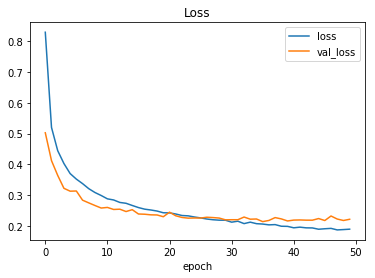

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

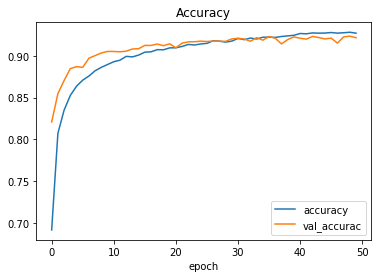

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accurac'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [20]:
model.metrics_names

['loss', 'accuracy']

In [21]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 78us/step


[0.20601540948450564, 0.9254999756813049]

In [24]:
from sklearn.metrics import classification_report

In [25]:
predictions = model.predict_classes(X_test)

In [26]:
y_test.shape

(10000, 10)

In [27]:
y_test[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
predictions[0]

0

In [29]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]


target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))
 

              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.84      0.88      1000
     Class 3       0.93      0.94      0.93      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.97      0.99      0.98      1000
     Class 6       0.77      0.81      0.79      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [35]:
model.save('Fashion_mnist.h5')

NameError: name 'lenet' is not defined

In [34]:
from IPython.display import FileLink, FileLinks
FileLinks('.') #lists all downloadable files on server

./
  __notebook_source__.ipynb